# **Laboratorio 5**



*   Santiago Cassiano Rozo
*   Juliana Catalina de Castro Moreno
*   Luis Fernando Mendez Marques
*   Ivan Alexander Morales Muñoz
*   Juan Esteban Oviedo Garcia
*   Nicolás Mauricio Rincón Vija



In [ ]:
#importo las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [ ]:
#Funcion auxiliar para convertir una lista en decimal
def listToDecimal(num): #O(num) | O(n)
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

# Funcion auxiliar para graficar la poblacion inicial
def populationGraph(population, range_search, function): #O(population) | O(n)
  # Ejes para la grafica de la funcion
  y_axis = []
  x_axis = np.arange(range_search[0], range_search[1], (range_search[1]-range_search[0])/100)
  # Grafica de la funcion 
  for num in x_axis:
    y_axis.append(function(num))
  plt.plot(x_axis, y_axis)

  # Grafica de los individuos sobre la curva
  for individuo in population:
    x = listToDecimal(individuo)
    y = function(x)
    plt.plot(x, y, 'X')
  plt.show()

# Funcion auxiliar para el error por generaciones
def generationalAverageError(population, real_max_of_function, function): #O(population) | O(n)
  errors = []
  for individual in population:
    errors.append(abs(real_max_of_function - function(listToDecimal(individual))))
  # Informe del error
  return sum(errors)/len(errors)
  

In [ ]:
from matplotlib.ticker import FixedFormatter
  
def geneticMaximize(genome_size, population_size, mutation_prob, generations, range_search, optimization_function, real_max_of_function):
  #Complejidad total del algoritmo: #O(generations*population_size*genome_size)| O(n^3)

  # Definimos el codigo genetico de base del cual se generarán los individuos
  genetic_pool = [[*range(range_search[0], range_search[1])], [*range(10)]] #O(1)
  
  
  # Creacion de la poblacion 
  poblacion = [] #O(1)
  for ind in range(population_size):  #O(population_size) | O(n)
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1], genome_size-1))
    poblacion.append(individuo)


  # Grafico de la poblacion inicial 
  print(bcolors.OKCYAN + "POBLACION INICIAL SOBRE LA CURVA DE F(X)"+ bcolors.ENDC) #O(1)
  populationGraph(poblacion, range_search, function=optimization_function) #O(population_size) | O(n)

  # Listado para los errores
  errors = [] #O(1)
  # Listado para el mejor individuo en x
  best_ind_x = [] #O(1)
  # Listado para el mejor individuo en y
  best_ind_y = [] #O(1)

  # Iteracion de generaciones
  for _ in range(generations): #O(generations)*O(population_size)*O(genome_size) | O(n^3)
    # Medicion del exito 
    fitness =[] #O(1)
    # Se evalua cada individuo 
    for individuo in poblacion: #O(population_size)*O(genome_size) | O(n^2)
        x = listToDecimal(individuo) #O(genome_size) | O(n)
        y = optimization_function(x) #O(1)
        # Se debe asegurar un fitness positivo, de otro modo el modelo falla
        fitness += [y] #O(1)
    # Usando los arrays de numpy se facilitan las operaciones
    fitness = np.array(fitness)
    # Normalizando el resultado de la evaluacion de exito
    fitness = fitness/fitness.sum()  #O(population_size) | O(n)


    # Entrecruzamiento de genes en la poblacion
    offspring = [] #O(1)
    # Requerimos un padre y una madre, de modo que la poblacion se divide en 2
    for i in range(population_size//2): #O(population_size) | O(n)
        parents = np.random.choice(population_size, 2, p=fitness)
        cross_point = np.random.randint(genome_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    # La poblacion es ahora la nueva generacion de descendientes
    poblacion = offspring #O(1)

    """
    # Este bloque de codigo permite graficar la generación actual
    print(bcolors.OKGREEN + "\nPOBLACION LUEGO DE ENTRECRUZAMIENTO SOBRE LA CURVA DE F(X)"+ bcolors.ENDC)
    populationGraph(poblacion, range_search, function=optimization_function) 
    """


    # Es posible ejecutar mutaciones dentro de la poblacion para producir nuevos genes
    for i in range(population_size): #O(population_size)*O(genome_size) | O(n^2)
      mutated_individual = poblacion[i] #O(1)
      # Se genera un entero al azar para determinar si este individuo tendra la mutacion
      if np.random.random() < mutation_prob: #O(1)
        # Mutacion en la primera seccion del genoma
        mutation = np.random.choice(genetic_pool[0]) #O(1)
        mutated_individual = [mutation] + mutated_individual[1:] #O(1)
      # Mutacion en la segunda seccion del genoma
      for j in range(1,len(mutated_individual)): #O(genome_size) | O(n)
        if np.random.random() < mutation_prob: #O(1)
          mutation = np.random.choice(genetic_pool[1]) #O(1)
          mutated_individual = mutated_individual[0:j] + [mutation] + mutated_individual[j+1:] #O(1)
          poblacion[i] = mutated_individual #O(1)
    """
    # Este bloque de codigo permite graficar la generación despues de las mutaciones
    print(bcolors.OKBLUE + "\nPOBLACION LUEGO DE APARICION DE MUTACIONES SOBRE LA CURVA DE F(X)"+ bcolors.ENDC)
    populationGraph(poblacion, range_search, function=optimization_function)
    """ 

    # Seleccion del mejor individuo (X) y su genoma(Y)
    individual_fitness = np.where(fitness == fitness.max()) #O(population_size) | O(n)
    id_ind = individual_fitness[0][0] #O(1)
    value = listToDecimal(poblacion[id_ind]) #O(1)
    max_f = optimization_function(value) #O(1)
    # Historico de resultados de mejores individuos en el eje X y en eje Y
    best_ind_x.append(value); #O(1)
    best_ind_y.append(max_f); #O(1)

    # Calculo y almacenado del error generacional 
    gen_error = generationalAverageError(poblacion, real_max_of_function, optimization_function) #O(population_size) | O(n)
    errors.append(gen_error) #O(population_size) | O(n)

  """
  Graficas finales / Informes
  """
  # Graficamos la nueva generacion
  print(bcolors.OKBLUE + "\nPOBLACION FINAL SOBRE LA CURVA DE F(X)"+ bcolors.ENDC)  #O(1)
  populationGraph(poblacion, range_search, function=optimization_function)  #O(population_size) | O(n)
  
  # Graficamos el error generacional
  print(bcolors.OKBLUE + "\nERROR PROMEDIO POR GENERACION"+ bcolors.ENDC) #O(1)
  plt.plot([*range(generations)], errors) #O(generations) | O(n)
  plt.show()

  
  # Graficamos el mejor individuo por generacion
  print(bcolors.OKBLUE + "\nMEJOR INDIVIDUO POR GENERACION"+ bcolors.ENDC) #O(1)
  plt.plot([*range(generations)], best_ind_x) #O(generations) | O(n)
  plt.show()

  # Informamos quien fue el mejor individuo en x, tambien se indica su valor en Y, junto con el numero de la generacion ocurrio
  global_max_f = max(best_ind_y) #O(generations) | O(n)
  global_max_gen = best_ind_y.index(global_max_f) #O(generations) |O(n)
  print(bcolors.BOLD + f"\nEL MEJOR INDIVIDUO OCURRE EN LA GENERACION {global_max_gen} CON UN VALOR DE X={best_ind_x[global_max_gen]}, DANDO COMO RESULTADO Y={best_ind_y[global_max_gen]} "+ bcolors.ENDC) #O(1)

# **Probar el algoritmo con entradas del usuario:**

In [ ]:
#Defina aqui la funcion a optimizar y luego ejecute el codigo para ingresar lo demas datos
def user_function(x):
  return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

genome_size = int(input("¿Tamaño del genoma? "))
population_size = int(input("¿Tamaño de la población? "))
mutation_prob  = float(input("¿Probabilidad mutación? "))
generations = int(input("¿Generaciones? "))
range_search = list(map(int, input("¿Rango de busqueda? Ingrese el numero del inicio del rango y del final del rango separados por un espacio ").split()))
real_max_of_function = int(input("¿Cual es el valor maximo real de la función? "))

geneticMaximize(genome_size=genome_size, population_size=population_size, mutation_prob=mutation_prob, generations=generations, range_search=range_search, optimization_function=user_function, real_max_of_function=real_max_of_function)

# **Pruebas del algoritmo en algunas funciones**
En esta seccion se prueba el algoritmo con funciones de distinto tipo.
Debido a la forma en que fue realizado el algoritmo, el algoritmo unicamente puede buscar el maximo en funciones que sean positivas en todo el espacio de busqueda que se le indique al algoritmo.

Se observa que en todos los casos el algoritmo se acerca bastante al maximo de las funciones tanto lineales como oscilantes en alguna de sus generaciones. Aunque cabe resaltar, que si se tienen pocas genereaciones o no se logra llegar por medio de una mutacion a un valor mas alto, puede que el algoritmo se quede en un maximo local, especialmente en el caso de las funciones oscilantes.

POBLACION INICIAL SOBRE LA CURVA DE F(X)


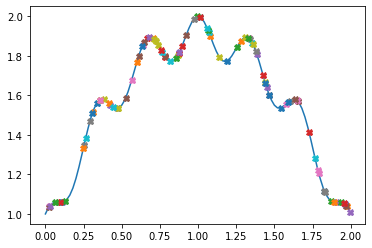


POBLACION FINAL SOBRE LA CURVA DE F(X)


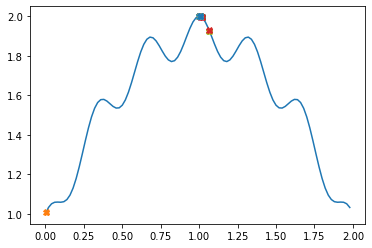


ERROR PROMEDIO POR GENERACION


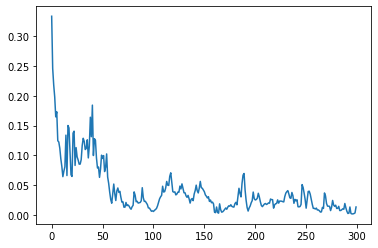


MEJOR INDIVIDUO POR GENERACION


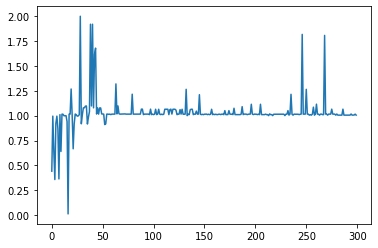


EL MEJOR INDIVIDUO OCURRE EN LA GENERACION 133 CON UN VALOR DE X=1.00031663382552, DANDO COMO RESULTADO Y=1.9999981186542013 


In [ ]:
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

geneticMaximize(genome_size=15, population_size=100, mutation_prob=0.005, generations=300, range_search=[0, 2], optimization_function=fx, real_max_of_function = 2)

POBLACION INICIAL SOBRE LA CURVA DE F(X)


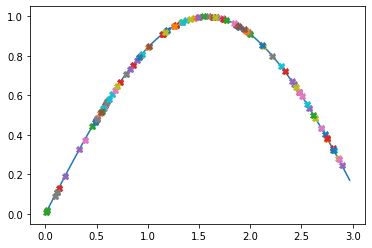


POBLACION FINAL SOBRE LA CURVA DE F(X)


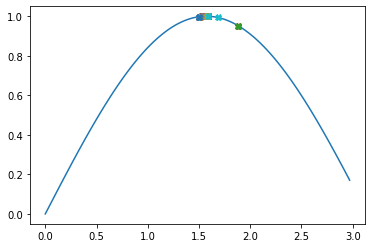


ERROR PROMEDIO POR GENERACION


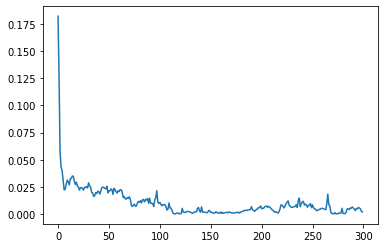


MEJOR INDIVIDUO POR GENERACION


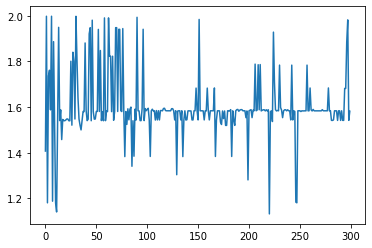


EL MEJOR INDIVIDUO OCURRE EN LA GENERACION 65 CON UN VALOR DE X=1.58016564850784, DANDO COMO RESULTADO Y=0.9999561082264048 


In [ ]:
def sinf(x):
    return math.sin(x)

geneticMaximize(genome_size=15, population_size=100, mutation_prob=0.005, generations=300, range_search=[0,3], optimization_function=sinf, real_max_of_function=1)

POBLACION INICIAL SOBRE LA CURVA DE F(X)


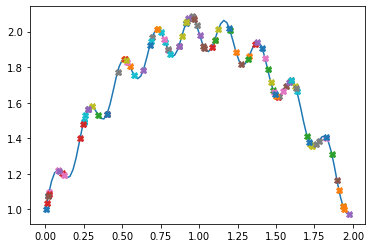


POBLACION FINAL SOBRE LA CURVA DE F(X)


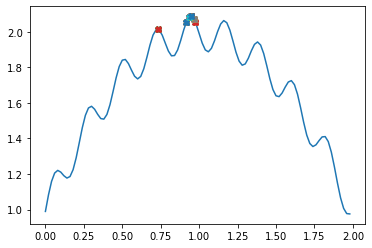


ERROR PROMEDIO POR GENERACION


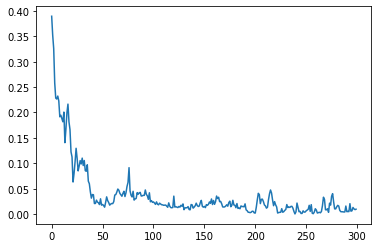


MEJOR INDIVIDUO POR GENERACION


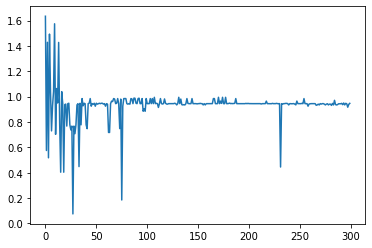


EL MEJOR INDIVIDUO OCURRE EN LA GENERACION 183 CON UN VALOR DE X=0.9458492031002301, DANDO COMO RESULTADO Y=2.0869888231443503 


In [ ]:
def osc(x):
    return -(0.01+(1-x)**2-0.1*math.sin(9*math.pi*(1-x)))+2

geneticMaximize(genome_size=15, population_size=100, mutation_prob=0.005, generations=300, range_search=[0, 2], optimization_function=osc, real_max_of_function=2.087)

POBLACION INICIAL SOBRE LA CURVA DE F(X)


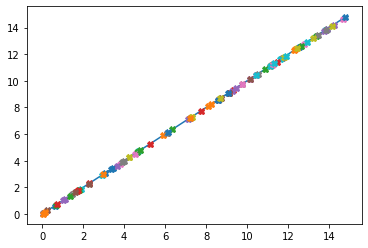


POBLACION FINAL SOBRE LA CURVA DE F(X)


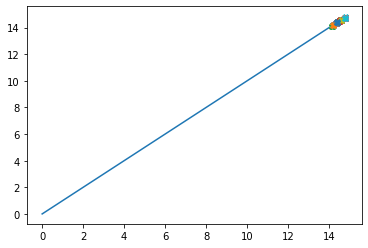


ERROR PROMEDIO POR GENERACION


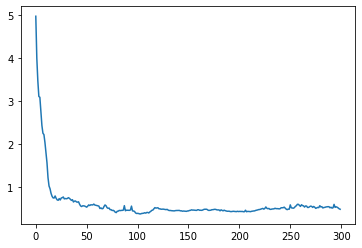


MEJOR INDIVIDUO POR GENERACION


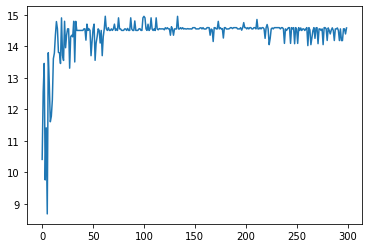


EL MEJOR INDIVIDUO OCURRE EN LA GENERACION 62 CON UN VALOR DE X=14.955766139526235, DANDO COMO RESULTADO Y=14.955766139526235 


In [ ]:
def lineal(x):
    return x

geneticMaximize(genome_size=15, population_size=100, mutation_prob=0.005, generations=300, range_search=[0, 15], optimization_function=lineal, real_max_of_function=14.9999999999)

# **¿Como influyen diferentes parametros en el tiempo de ejecucion?**

In [ ]:
# Version ajustada del algoritmo sin graficas, esta version se utilizara en esta seccion para calcular el tiempo de ejecucion del algoritmo

def geneticMaximize(genome_size, population_size, mutation_prob, generations, range_search, optimization_function, real_max_of_function):
  # Definimos el codigo genetico de base del cual se generarán los individuos
  genetic_pool = [[*range(range_search[0], range_search[1])], [*range(10)]]
  
  
  # Creacion de la poblacion 
  poblacion = []
  for ind in range(population_size):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1], genome_size-1))
    poblacion.append(individuo)

  # Listado para los errores
  errors = []
  # Listado para el mejor individuo en x
  best_ind_x = []
  # Listado para el mejor individuo en y
  best_ind_y = []
  # Iteracion de generaciones
  for _ in range(generations):
    # Medicion del exito 
    fitness =[]
    # Se evalua cada individuo 
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = optimization_function(x)
        # Se debe asegurar un fitness positivo, de otro modo el modelo falla
        fitness += [y]
    # Usando los arrays de numpy se facilitan las operaciones
    fitness = np.array(fitness)
    # Normalizando el resultado de la evaluacion de exito
    fitness = fitness/fitness.sum()   


    # Entrecruzamiento de genes en la poblacion
    offspring = []
    # Requerimos un padre y una madre, de modo que la poblacion se divide en 2
    for i in range(population_size//2):
        parents = np.random.choice(population_size, 2, p=fitness)
        cross_point = np.random.randint(genome_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    # La poblacion es ahora la nueva generacion de descendientes
    poblacion = offspring


    # Es posible ejecutar mutaciones dentro de la poblacion para producir nuevos genes
    for i in range(population_size):
      mutated_individual = poblacion[i]
      # Se genera un entero al azar para determinar si este individuo tendra la mutacion
      if np.random.random() < mutation_prob:
        # Mutacion en la primera seccion del genoma
        mutation = np.random.choice(genetic_pool[0])
        mutated_individual = [mutation] + mutated_individual[1:]
      # Mutacion en la segunda seccion del genoma
      for j in range(1,len(mutated_individual)):
        if np.random.random() < mutation_prob:
          mutation = np.random.choice(genetic_pool[1])
          mutated_individual = mutated_individual[0:j] + [mutation] + mutated_individual[j+1:]
          poblacion[i] = mutated_individual

    # Seleccion del mejor individuo (X) y su genoma(Y)
    individual_fitness = np.where(fitness == fitness.max())
    id_ind = individual_fitness[0][0]
    value = listToDecimal(poblacion[id_ind])
    max_f = optimization_function(value)
        # Historico de resultados de mejores individuos en el eje X y en eje Y
    best_ind_x.append(value);
    best_ind_y.append(max_f);

    # Calculo y almacenado del error generacional 
    gen_error = generationalAverageError(poblacion, real_max_of_function, optimization_function)
    errors.append(gen_error)

In [ ]:
import datetime

genome_size = [10, 100, 1000, 2000]
population_size = [10, 100, 1000, 2000]
mutation_prob  = [0.01, 0.1, 0.5, 0.8, 1]
generations = [10, 100, 1000, 2000]
range_search = [[0, 1], [0, 2]]

def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

In [ ]:
# Genoma
for i in genome_size:
  tic = datetime.datetime.now()
  geneticMaximize(genome_size=i, population_size=100, mutation_prob=0.005, generations=100, range_search=[0, 2], optimization_function=fx, real_max_of_function=2)
  tac = datetime.datetime.now()
  print(f"Para parametro genoma {i} > {tac-tic} \n\n")


Para parametro genoma 10 > 0:00:00.906180 


Para parametro genoma 100 > 0:00:05.961513 


Para parametro genoma 1000 > 0:01:01.429062 


Para parametro genoma 2000 > 0:02:05.462562 




In [ ]:
# Population size
for i in population_size:
  tic = datetime.datetime.now()
  geneticMaximize(genome_size=15, population_size=i, mutation_prob=0.005, generations=100, range_search=[0, 2], optimization_function=fx, real_max_of_function=2)
  tac = datetime.datetime.now()
  print(f"Para parametro tamaño poblacion {i} > {tac-tic} \n\n")


Para parametro tamaño poblacion 10 > 0:00:00.129723 


Para parametro tamaño poblacion 100 > 0:00:01.209316 


Para parametro tamaño poblacion 1000 > 0:00:15.966701 


Para parametro tamaño poblacion 2000 > 0:00:25.712003 




In [ ]:
# Mutation prob
for i in mutation_prob:
  tic = datetime.datetime.now()
  geneticMaximize(genome_size=15, population_size=100, mutation_prob=i, generations=100, range_search=[0, 2], optimization_function=fx, real_max_of_function=2)
  tac = datetime.datetime.now()
  print(f"Para parametro probabilidad de mutacion {i} > {tac-tic} \n\n")


Para parametro probabilidad de mutacion 0.01 > 0:00:01.212672 


Para parametro probabilidad de mutacion 0.1 > 0:00:01.339554 


Para parametro probabilidad de mutacion 0.5 > 0:00:02.343851 


Para parametro probabilidad de mutacion 0.8 > 0:00:03.183847 


Para parametro probabilidad de mutacion 1 > 0:00:03.867119 




In [ ]:
# Generations
for i in generations:
  tic = datetime.datetime.now()
  geneticMaximize(genome_size=15, population_size=100, mutation_prob=0.005, generations=i, range_search=[0, 2], optimization_function=fx, real_max_of_function=2)
  tac = datetime.datetime.now()
  print(f"Para parametro generaciones {i} > {tac-tic} \n\n")


Para parametro generaciones 10 > 0:00:00.124242 


Para parametro generaciones 100 > 0:00:01.226541 


Para parametro generaciones 1000 > 0:00:11.809732 


Para parametro generaciones 2000 > 0:00:22.985334 




In [ ]:
# Range Search
for i in range_search:
  tic = datetime.datetime.now()
  geneticMaximize(genome_size=15, population_size=100, mutation_prob=0.005, generations=100, range_search=i, optimization_function=fx, real_max_of_function=2)
  tac = datetime.datetime.now()
  print(f"Para parametro rango de busqueda {i} > {tac-tic} \n\n")

Para parametro rango de busqueda [0, 1] > 0:00:01.130410 


Para parametro rango de busqueda [0, 2] > 0:00:01.140615 




## **Analisis de la complejidad del algoritmo**
Al hacer un analisis de complejidad del algoritmo, la complejidad simplificada que se obtiene es de O(n^3).

Aunque, especificamente, la complejidad del algoritmo en funcion de sus parametros podria describirse como:
O(Generaciones⋅TamañoPoblacion⋅LongitudDelGenoma).

A continuacion se muestran graficas del impacto al modificar un solo parametro, en el tiempo de ejecución del algoritmo:





**Longitud del genoma:** Se observa que al hacer crecer unicamente la longitud del genoma, y dejando los demas parametros constantes, el tiempo de ejecucion crece como una funcion lineal, es decir, es acotado por O(n). Esto tiene sentido con el analisis de complejidad realizado previamente, ya que si las generaciones y el tamaño de la poblacion permanecieran constantes, la ejecucion del algoritmo unicamente dependeria de la longitud del genoma de manera lineal. 

Por otra parte, el tamaño del genoma es importante en el costo de espacio del algoritmo, ya que, a mayor tamaño del genoma, se requiere mas espacio para guardar cada gen de los individuos de la población.

*Eje X: Tamaño del genoma, Eje Y:Tiempo de ejecucion en segundos*
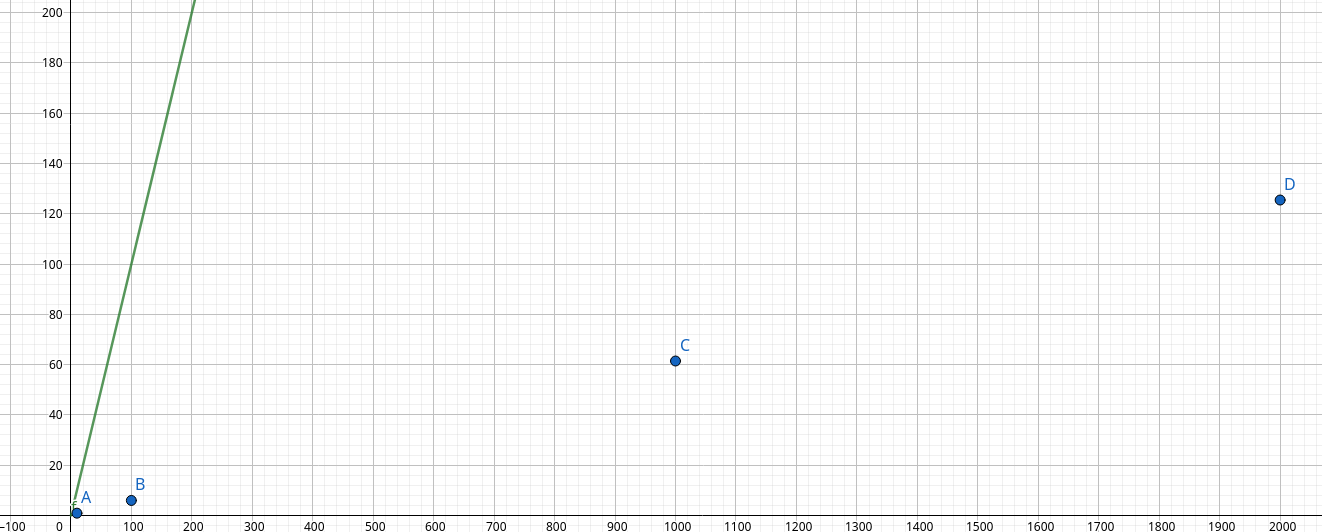

**Tamaño de la población**: Al incrementar unicamente este parametro, tambien parece que el tiempo aumenta de manera lineal, de manera que parece ser acotado por O(n).

Por otra parte, el tamaño de la población tambien es importante en el costo de espacio del algoritmo, ya que, a mayor tamaño de la poblacion, se requiere mas espacio para guardar cada individuo nuevo en la poblacion y su genoma.

*Eje X: Tamaño de la poblacion, Eje Y:Tiempo de ejecucion en segundos*
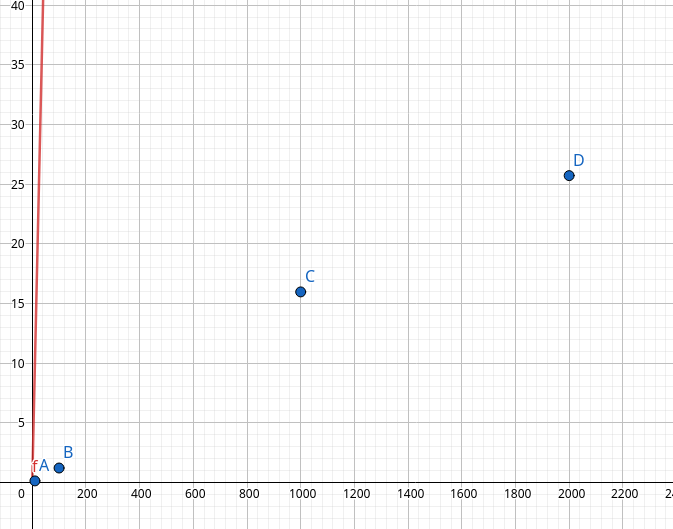

**Generaciones**: El numero de generaciones tambien tiene un peso significativo en el tiempo de ejecución. Si se aumenta unicamente el numero de generaciones, el tiempo de ejecución del algoritmo se espera que aumente linealmente.

Por otra parte, el numero de generaciones al aumentar pide un poco mas de espacio, ya que se requiere almacenar los mejores resultados por generacion. Pero no incrementa tanto el espacio necesario del algoritmo con respecto a otros parametros como el tamaño de la poblacion o el tamaño del genoma.

*Eje X: Generaciones, Eje Y:Tiempo de ejecucion en segundos*

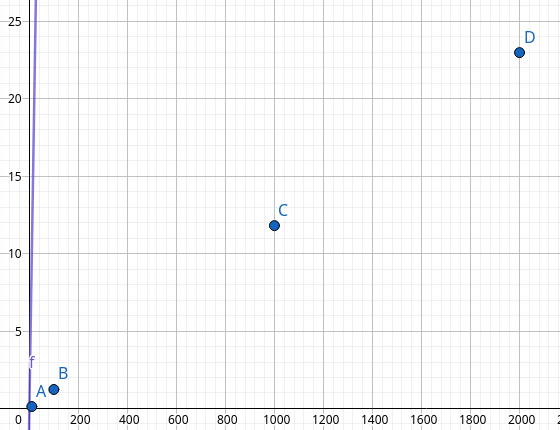

**Probabilidad de mutacion**: No representa un factor determinante en el tiempo de convergencia. Es evidente en tanto solo se emplea para determinar comparaciones de tiempo constante. Aunque en la grafica se ve que al aumentar la mutacion aumenta el tiempo de ejecucion aumenta. La diferencia entre el valor mas bajo de mutacion y maximo valor de mutacion es muy baja. Ya que a pesar de aumentar al maximo el valor, no se ve un cambio significativo en el tiempo, se puede concluir que el peso de este factor en el tiempo es casi constante. 

Tampoco afecta el costo de espacio del algoritmo.

*Eje X: Probabilidad de Mutacion, Eje Y:Tiempo de ejecucion en segundos*

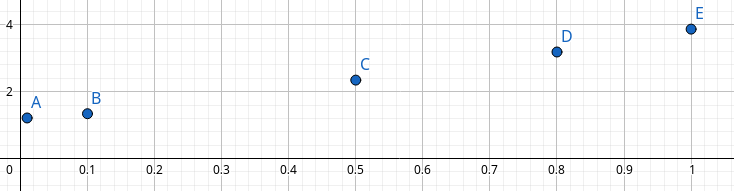

**Rango de busqueda**: El rango de busqueda se presenta como uno de los factores de menor influencia, presenta tiempos casi constantes independiente del tamaño del rango y su funcion. 

En cuanto al espacio su impacto es bajo, al aumentar el rango de busqueda, se requiere un poco mas de espacio, ya que se deben almacenar mas opciones de numeros en los genetic_pool para constuir los genomas de los individuos.

*Eje X: Tamaño Rango de busqueda, Eje Y:Tiempo de ejecucion en segundos*

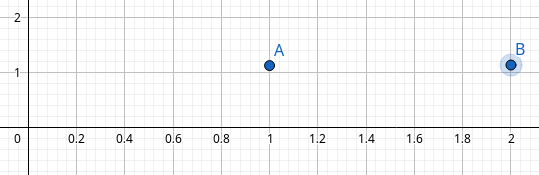

## **¿Qué parámetro es más relevante para acelerar la convergencia de la búsqueda?**

Luego de realizar el analisis de complejidad del algoritmo, Se observa que la complejidad simplificada del algoritmo O(n^3).

Pero esta complejidad depende especificamente del tamaño de tres parametros, los cuales son O(Generaciones⋅TamañoPoblacion⋅LongitudDelGenoma).

A partir de ello se puede concluir, que para acelerar la velocidad de convergencia, los tres parametros mas importantes a disminuir son la cantidad de generaciones, el tamaño de la poblacion, o el tamaño del genoma. Aunque cabe resaltar que a pesar de que la velocidad de convergencia sera menor, tambien puede hacer que la busqueda sea menos precisa, ya que a medida que es mayor el valor de dichos parametros, el algoritmo prueba mas posibilidades de individuos, lo cual puede llevar a encontrar una mejor solución.

Por ultimo, si se tuviera que seleccionar un solo parámetro para acelerar la convergencia de la búsqueda, para el caso de la implementación realizada por el grupo seria la Longitud del genoma, como se puede observar en las pruebas, al aumentar la longitud del genoma, este fue el parametro que mas aumento el tiempo de ejecución. Creemos que esto es posible debido a que cuando se incrementa el tamaño del genoma, se requieren mas operaciones para calcular la funcion listToDecimal(), ademas, al incrementar el tamaño del genoma las operaciones sobre la lista de los genes toman mas tiempo, lo cual hace que el tiempo de ejecucion se incremente bastante linealmente.